In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

In [38]:
data = {'Natural Disasters': [47, 56, 387, 113],
        'Human Attack': [242, 48, 101, 71],
        'Equipment Failure': [208, 59, 105, 17],
        'Suspicious Activity': [102, 12, 23, 19],
        'Other': [29, 11, 15, 7],
        'Fuel Deficiency': [0, 2, 9, 21],
        'Generation Deficiency': [14, 2, 4, 0],
        'Planned Outage': [0, 0, 3, 0]}
dur = ['[0, 3) Hours  ', '[3, 6) Hours', '+6 Hours', 'Unknown']
total=np.sum([sum(t) for t in data.values()])

In [56]:
total

1727

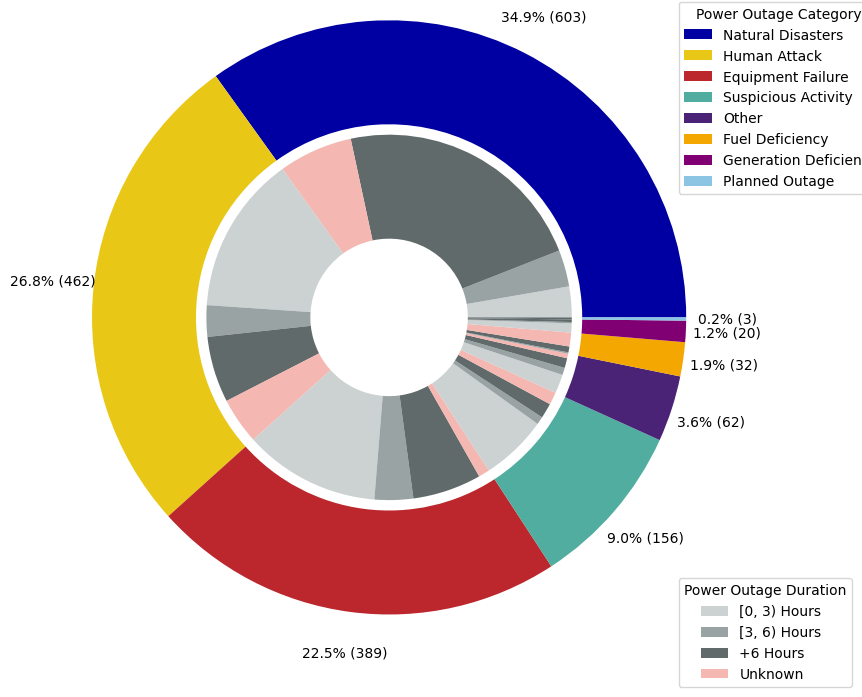

In [55]:
fig, ax = plt.subplots(figsize=(16, 8), subplot_kw=dict(projection="polar"))

size = 0.35
keys = list(data.keys())
vals = np.array([data[keys[0]], data[keys[1]],
                 data[keys[2]], data[keys[3]],
                 data[keys[4]], data[keys[5]],
                 data[keys[6]], data[keys[7]], ])
# Normalize vals to 2 pi
valsnorm = vals/np.sum(vals)*2*np.pi
# Obtain the cordinates of the bar edges
valsleft = np.cumsum(np.append(0, valsnorm.flatten()[:-1])).reshape(vals.shape)

cmap = plt.colormaps["tab20c"]
outer_colors = ['#0000a2', '#e9c716', '#bc272d', '#50ad9f', '#4a2377', '#f4a700', '#800074', '#8cc5e3']
inner_colors = ['#CCD1D1', '#99A3A4', '#616A6B', '#F5B7B1']

outer_bars = ax.bar(x=valsleft[:, 0],
       width=valsnorm.sum(axis=1), bottom=1-size, height=size,
       color=outer_colors, edgecolor='w', linewidth=0, align="edge",
       label=data.keys())

# Add percentages to outer slices
for i, (bar, val) in enumerate(zip(outer_bars, vals)):
    angle = valsleft[i, 0] + valsnorm[i, 0] / 2
    xpos = bar.get_x() + bar.get_width() / 2
    ypos = bar.get_y() + bar.get_height() / 2
    ax.text(xpos, 1.38*ypos, f"{np.sum(val)/np.sum(vals)*100:0.1f}% ({int(np.sum(val))})",
            ha='center', va='center')


ax.bar(x=valsleft.flatten(),
       width=valsnorm.flatten(), bottom=1-2.1*size, height=size,
       color=inner_colors, edgecolor='w', linewidth=0, align="edge",
       label=[i for i in dur] * 8)

# Create legends
handles, labels = ax.get_legend_handles_labels()
outer_legend = ax.legend(handles[:8], labels[:8], title='Power Outage Category ',loc=(0.97, 0.7))
inner_legend = ax.legend(handles[8:12], labels[8:12], title='Power Outage Duration', loc=(0.97, -0.1))

# Add both legends to the plot
ax.add_artist(outer_legend)
#ax.text(x=3*np.pi/2, y=1.2, s=f'Total Number of Outages = {total}')

ax.set_axis_off()
plt.savefig('../IMG/Power Outage Cat. Dis.jpg', dpi=800, bbox_inches='tight', pad_inches=0.5)